In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import sklearn

In [2]:
df=pd.read_csv("C:/Users/jpadmanabhan/Downloads/Spaceship_Titanic/train.csv")

In [3]:
df2=pd.read_csv("C:/Users/jpadmanabhan/Downloads/Spaceship_Titanic/test.csv")

In [4]:
df3=pd.read_csv("C:/Users/jpadmanabhan/Downloads/Spaceship_Titanic/test.csv")

In [5]:
df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [6]:
(len(df) - df.count())/len(df)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [7]:
df2.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [8]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
import math

df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace = True)
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace = True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace = True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace = True)
df['VIP'].fillna(df['VIP'].mode()[0], inplace = True)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())


df2['HomePlanet'].fillna(df2['HomePlanet'].mode()[0], inplace = True)
df2['CryoSleep'].fillna(df2['CryoSleep'].mode()[0], inplace = True)
df2['Cabin'].fillna(df2['Cabin'].mode()[0], inplace = True)
df2['Destination'].fillna(df2['Destination'].mode()[0], inplace = True)
df2['VIP'].fillna(df2['VIP'].mode()[0], inplace = True)
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())
df2['RoomService'] = df2['RoomService'].fillna(df2['RoomService'].mean())
df2['FoodCourt'] = df2['FoodCourt'].fillna(df2['FoodCourt'].mean())
df2['ShoppingMall'] = df2['ShoppingMall'].fillna(df2['ShoppingMall'].mean())
df2['Spa'] = df2['Spa'].fillna(df2['Spa'].mean())
df2['VRDeck'] = df2['VRDeck'].fillna(df2['VRDeck'].mean())

In [10]:
# for i in range(0, df['PassengerId'].count()):
#     df['RoomService'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [11]:
pid = df['PassengerId'].str.split('_',expand = True)
pid
df['Pid1'] = pid[0]
df['Pid2'] = pid[1]

Cabin_split = df['Cabin'].str.split('/',expand = True)
df['Cabin']= Cabin_split[2]


pid = df2['PassengerId'].str.split('_',expand = True)
pid
df2['Pid1'] = pid[0]
df2['Pid2'] = pid[1]

Cabin_split = df2['Cabin'].str.split('/',expand = True)
df2['Cabin']= Cabin_split[2]

In [12]:
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Pid1,Pid2
0,0013_01,Earth,True,S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01
1,0018_01,Earth,False,S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01
2,0019_01,Europa,True,S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01
3,0021_01,Europa,False,S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01
4,0023_01,Earth,False,S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01


In [13]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Pid1,Pid2
0,0001_01,Europa,False,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [14]:
# df.Name=df.Name.astype(str)
# df.Name = le.fit_transform(df.Name)

In [15]:
df.drop(["PassengerId", "Name", "Cabin"],axis = 1, inplace=True)
df2.drop(["PassengerId", "Name", "Cabin"],axis = 1, inplace=True)
#,"FoodCourt","ShoppingMall","Spa","VRDeck"

In [16]:
df.Destination.unique().tolist()

['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']

In [17]:
#df['Cabin'] = df['Cabin'].str[:1]
# df['Cabin'] = pd.to_numeric(df['Cabin'].str.extract('(\d+)')[0],errors='coerce') 

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df['HomePlanet'] = lb.fit_transform(df['HomePlanet'])
df['CryoSleep'] = lb.fit_transform(df['CryoSleep'])
#df['Cabin'] = lb.fit_transform(df['Cabin'])
df['Destination'] = lb.fit_transform(df['Destination'])
df['VIP'] = lb.fit_transform(df['VIP'])
#df['RoomService'] = lb.fit_transform(df['RoomService'])
df['Transported'] = lb.fit_transform(df['Transported'])


df2['HomePlanet'] = lb.fit_transform(df2['HomePlanet'])
df2['CryoSleep'] = lb.fit_transform(df2['CryoSleep'])
#df2['Cabin'] = lb.fit_transform(df2['Cabin'])
df2['Destination'] = lb.fit_transform(df2['Destination'])
df2['VIP'] = lb.fit_transform(df2['VIP'])
#df2['RoomService'] = lb.fit_transform(df2['RoomService'])

In [18]:
# for i in range(0, df['RoomService'].count()):
#     if df['RoomService'][i] >= 1919:
#         df['RoomService'][i] = 1 
#         #print(df['Age'][i])
#     else:
#         df['RoomService'][i] = 0

        
# for i in range(0, df['Age'].count()):
#     if df['Age'][i] >= 18:
#         df['Age'][i] = 1 
#         #print(df['Age'][i])
#     else:
#         df['Age'][i] = 0

In [19]:
# for i in range(0, df2['PassengerId'].count()):
#     df2['RoomService'] = df2['RoomService'] + df2['FoodCourt'] + df2['ShoppingMall'] + df2['Spa'] + df2['VRDeck']

In [20]:
# for i in range(0, df2['RoomService'].count()):
#     if df2['RoomService'][i] >= 1919:
#         df2['RoomService'][i] = 1 
#         #print(df['Age'][i])
#     else:
#         df2['RoomService'][i] = 0
        
        
        
# for i in range(0, df2['Age'].count()):
#     if df2['Age'][i] >= 18:
#         df2['Age'][i] = 1 
#         #print(df['Age'][i])
#     else:
#         df2['Age'][i] = 0

In [21]:
# df2['Age'].fillna(df2['Age'].mode()[0], inplace=True)
# df2['RoomService'].fillna(df2['RoomService'].mode()[0], inplace = True)
#df.dropna(inplace=True)

In [22]:
# from sklearn.impute import SimpleImputer

# df['Age'].fillna(df['Age'].mode()[0], inplace=True)
# df['RoomService'].fillna(df['RoomService'].mode()[0], inplace = True)
#df.dropna(inplace=True)

# impute=SimpleImputer(missing_values=np.nan, strategy='mean')
# x=impute.fit_transform(x)
# df2=impute.fit_transform(df2)
# x=pd.DataFrame(x,columns=x_key)
# x

In [23]:
df2.dtypes

HomePlanet        int32
CryoSleep         int64
Destination       int32
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Pid1             object
Pid2             object
dtype: object

In [24]:
#df['HomePlanet'] = df['HomePlanet'].astype(int)
#df['CryoSleep'] = df['CryoSleep'].astype(int)
#df['Cabin'] = df['Cabin'].astype(int)
df['Age'] = df['Age'].astype(int)
#df['VIP'] = df['VIP'].astype(int)
df['RoomService'] = df['RoomService'].astype(int)
df['FoodCourt'] = df['FoodCourt'].astype(int)
df['ShoppingMall'] = df['ShoppingMall'].astype(int)
df['Spa'] = df['Spa'].astype(int)
df['VRDeck'] = df['VRDeck'].astype(int)
#df['Transported'] = df['Transported'].astype(int)
#df['Pid1'] = df['Pid1'].astype(int)
#df['Pid2'] = df['Pid2'].astype(int)

#df2['HomePlanet'] = df['HomePlanet'].astype(int)
#df2['CryoSleep'] = df2['CryoSleep'].astype(int)
#df['Cabin'] = df['Cabin'].astype(int)
df2['Age'] = df2['Age'].astype(int)
#df2['VIP'] = df2['VIP'].astype(int)
df2['RoomService'] = df2['RoomService'].astype(int)
df2['FoodCourt'] = df2['FoodCourt'].astype(int)
df2['ShoppingMall'] = df2['ShoppingMall'].astype(int)
df2['Spa'] = df2['Spa'].astype(int)
df2['VRDeck'] = df2['VRDeck'].astype(int)
#df2['Pid1'] = df2['Pid1'].astype(int)
#df2['Pid2'] = df2['Pid2'].astype(int)

In [25]:
df.corr()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.083586,0.034737,0.133752,0.123512,0.211528,0.071642,0.101057,0.055014,0.039576,0.115461
CryoSleep,0.083586,1.000000,-0.096287,-0.071005,-0.078281,-0.243987,-0.205683,-0.206373,-0.198392,-0.193107,0.460132
Destination,0.034737,-0.096287,1.000000,-0.006688,-0.044707,0.046388,-0.111049,0.024385,-0.055916,-0.073233,-0.108152
Age,0.133752,-0.071005,-0.006688,1.000000,0.091709,0.067717,0.127963,0.032794,0.120946,0.099232,-0.074245
VIP,0.123512,-0.078281,-0.044707,0.091709,1.000000,0.056595,0.126006,0.018483,0.060573,0.123093,-0.037261
RoomService,0.211528,-0.243987,0.046388,0.067717,0.056595,1.000000,-0.015520,0.052960,0.009924,-0.019206,-0.242046
FoodCourt,0.071642,-0.205683,-0.111049,0.127963,0.126006,-0.015520,1.000000,-0.013933,0.220587,0.224277,0.046074
ShoppingMall,0.101057,-0.206373,0.024385,0.032794,0.018483,0.052960,-0.013933,1.000000,0.013681,-0.007192,0.010016
Spa,0.055014,-0.198392,-0.055916,0.120946,0.060573,0.009924,0.220587,0.013681,1.000000,0.147958,-0.218791
VRDeck,0.039576,-0.193107,-0.073233,0.099232,0.123093,-0.019206,0.224277,-0.007192,0.147958,1.000000,-0.204826


In [171]:
#From df.corr(), these columns have low significance to the target column
# df.drop(["Age", "VIP", "FoodCourt", "ShoppingMall", "Pid1", "Pid2"],axis = 1, inplace=True)
# df2.drop(["Age", "VIP", "FoodCourt", "ShoppingMall", "Pid1", "Pid2"],axis = 1, inplace=True)
df.drop(["ShoppingMall"],axis=1, inplace=True)
df2.drop(["ShoppingMall"],axis=1, inplace=True)

In [26]:
# x = df.loc[:,['HomePlanet','CryoSleep','Cabin','Destination','VIP']]
x = df.drop('Transported', axis=1)
x.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Pid1,Pid2
0,1,0,2,39,0,0,0,0,0,0,0001,01
1,0,0,2,24,0,109,9,25,549,44,0002,01
2,1,0,2,58,1,43,3576,0,6715,49,0003,01
3,1,0,2,33,0,0,1283,371,3329,193,0003,02
4,0,0,2,16,0,303,70,151,565,2,0004,01


In [27]:
y = df['Transported']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
chi_features = SelectKBest(chi2, k = 3)
features = chi_features.fit(x,y)

In [30]:
#finding the best features. The best ones have 5 or more val.
features.pvalues_

array([2.44568578e-026, 2.13285563e-262, 1.78920131e-011, 2.39899543e-076,
       5.94598675e-004, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.17969793e-007])

In [31]:
x.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Pid1,Pid2
0,1,0,2,39,0,0,0,0,0,0,0001,01
1,0,0,2,24,0,109,9,25,549,44,0002,01
2,1,0,2,58,1,43,3576,0,6715,49,0003,01
3,1,0,2,33,0,0,1283,371,3329,193,0003,02
4,0,0,2,16,0,303,70,151,565,2,0004,01


In [85]:
#From features.pvalues_, these columns have low significance to the target column
df.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Pid1"],axis = 1, inplace=True)
df2.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Pid1"],axis = 1, inplace=True)

In [32]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Pid1,Pid2
0,1,0,2,39,0,0,0,0,0,0,0,0001,01
1,0,0,2,24,0,109,9,25,549,44,1,0002,01
2,1,0,2,58,1,43,3576,0,6715,49,0,0003,01
3,1,0,2,33,0,0,1283,371,3329,193,0,0003,02
4,0,0,2,16,0,303,70,151,565,2,1,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41,1,0,6819,0,1643,74,0,9276,01
8689,0,1,1,18,0,0,0,0,0,0,0,9278,01
8690,0,0,2,26,0,0,0,1872,1,0,1,9279,01
8691,1,0,0,32,0,0,1049,0,353,3235,0,9280,01


In [33]:
#x1 = df.iloc[:,:-1]
x1 = df.drop('Transported', axis=1)
y1 = df.Transported

In [34]:
x1

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Pid1,Pid2
0,1,0,2,39,0,0,0,0,0,0,0001,01
1,0,0,2,24,0,109,9,25,549,44,0002,01
2,1,0,2,58,1,43,3576,0,6715,49,0003,01
3,1,0,2,33,0,0,1283,371,3329,193,0003,02
4,0,0,2,16,0,303,70,151,565,2,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41,1,0,6819,0,1643,74,9276,01
8689,0,1,1,18,0,0,0,0,0,0,9278,01
8690,0,0,2,26,0,0,0,1872,1,0,9279,01
8691,1,0,0,32,0,0,1049,0,353,3235,9280,01


In [35]:
df2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Pid1,Pid2
0,0,1,2,27,0,0,0,0,0,0,0013,01
1,0,0,2,19,0,0,9,0,2823,0,0018,01
2,1,1,0,31,0,0,0,0,0,0,0019,01
3,1,0,2,38,0,0,6652,0,181,585,0021,01
4,0,0,2,20,0,10,0,635,0,0,0023,01
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34,0,0,0,0,0,0,9266,02
4273,0,0,2,42,0,0,847,17,10,144,9269,01
4274,2,1,0,28,0,0,0,0,0,0,9271,01
4275,1,0,2,28,0,0,2680,0,0,523,9273,01


In [36]:
y1

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split #train test package

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=39)

In [38]:
# from sklearn.preprocessing import MinMaxScaler

# mm_scaler = preprocessing.MinMaxScaler()
# x_train_minmax = mm_scaler.fit_transform(x_train)
# mm_scaler.transform(x_test)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6954, 12), (1739, 12), (6954,), (1739,))

In [40]:
# from sklearn.datasets import make_classification

# x_train1 = x_train
# y_train1 = y_train
# x_test1 = x_test
# y_test1 = y_test

# x_train2 = x_train
# y_train2 = y_train
# x_test2 = df2
# y_test2 = y_test


# x_train1, y_train1 = make_classification(n_samples=10000, n_features=39, n_informative=20, random_state=2)
# x_test1, y_test1 = make_classification(n_samples=10000, n_features=39, n_informative=20, random_state=2)

# x_train2, y_train2 = make_classification(n_samples=10000, n_features=39, n_informative=20, random_state=2)
# x_test2, y_test2 = make_classification(n_samples=10000, n_features=39, n_informative=20, random_state=2)

In [41]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter=3000, class_weight='balanced')
#,penalty='l2',multi_class='ovr',class_weight='balanced',solver='liblinear'
modelLR.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000)

In [42]:
y_predictLR = modelLR.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictLR)
accuracy
#0.7935595169637722

0.7935595169637722

In [43]:
y_predictLR1 = modelLR.predict(df2)
y_predictLR1

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
def mae(y_test, y_predictLR):
    y_test, y_predictLR = np.array(y_test), np.array(y_predictLR)
    return np.mean(np.abs(y_test - y_predictLR))

print(mae(y_test, y_predictLR))
#0.20644048303622772

0.20644048303622772


In [46]:
# output = pd.DataFrame({'PassengerId': df3.PassengerId, 'Transported': y_predictLR1})
# output['Transported'] = output['Transported'].replace({1: True, 0: False})
# output.to_csv('submission4.csv', index=False)

In [47]:
from sklearn.metrics import confusion_matrix

cmLR = confusion_matrix(y_test, y_predictLR)
cmLR

array([[673, 192],
       [167, 707]], dtype=int64)

<Figure size 720x504 with 0 Axes>

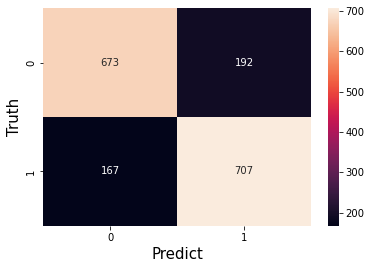

<Figure size 720x504 with 0 Axes>

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cmLR, annot=True, fmt='3.0f')
plt.xlabel('Predict', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.figure(figsize=(10, 7))

The cross validated score for Logistic Regression is: 78.48


Text(0.5, 1.05, 'Confusion_matrix')

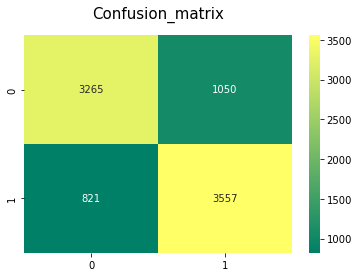

In [49]:
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(modelLR,x,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))
y_predLR = cross_val_predict(modelLR, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predLR),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [67]:
from sklearn.ensemble import RandomForestClassifier

#modelRFC = RandomForestClassifier(random_state=42, max_depth=5)
modelRFC = RandomForestClassifier(random_state=3, n_estimators = 150, min_samples_split = 3, min_samples_leaf = 6, max_depth = 200)
#modelRFC = RandomForestClassifier(criterion = 'log_loss', n_estimators=100, max_depth=100, random_state=3, bootstrap = False)
modelRFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=200, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=150, random_state=3)

In [68]:
y_predictRFC = modelRFC.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictRFC)
accuracy
#0.8073605520414031

0.8073605520414031

In [52]:
modelRFC.score(x_test, y_test)

0.8073605520414031

In [294]:
def mae(y_test, y_predictRFC):
    y_test, y_predictRFC = np.array(y_test), np.array(y_predictRFC)
    return np.mean(np.abs(y_test - y_predictRFC))

print(mae(y_test, y_predictRFC))
#0.20299022426682

0.20299022426682


In [439]:
#modelRFC = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=10)
#modelRFC = RandomForestClassifier(max_depth=2, random_state=0)
#modelRFC.fit(x_train, y_train)

In [297]:
index=df3['PassengerId']
test_pred=modelRFC.predict(df2)
pred=[]
for i in test_pred:
    if i==1:
        pred.append('True')
    else:
        pred.append('False')
submision=pd.DataFrame(pred,columns=['Transported'],index=index)
submision.to_csv('submission15.csv')
submision

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [271]:
y_predictRFC1 = modelRFC.predict(df2)
y_predictRFC1

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [250]:
output = pd.DataFrame({'PassengerId': df3.PassengerId, 'Transported': y_predictXGB1})
output['Transported'] = output['Transported'].replace({1: True, 0: False})
output.to_csv('submission7.csv', index=False)

In [136]:
cmRFC = confusion_matrix(y_test, y_predictRFC)
cmRFC

array([[686, 179],
       [330, 544]], dtype=int64)

The cross validated score for RFC is: 71.67


Text(0.5, 1.05, 'Confusion_matrix')

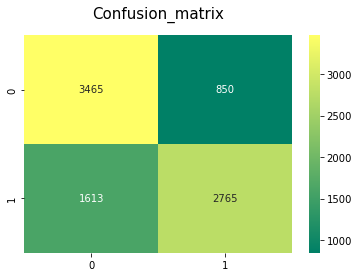

In [137]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_rfc=cross_val_score(modelRFC,x,y,cv=10,scoring='accuracy')
print('The cross validated score for RFC is:',round(result_rfc.mean()*100,2))
y_predRFC = cross_val_predict(modelRFC, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predRFC),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [284]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier(learning_rate=0.3, max_depth=3, random_state=44, n_estimators=43, colsample_bytree=0.9) 
modelXGB.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=43, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=44, ...)

In [282]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier(learning_rate=0.3,max_depth=4)
#objective="binary:logistic", eval_metric="auc" (90%)
modelXGB.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [285]:
y_predictXGB = modelXGB.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictXGB)
accuracy
#0.9087423312883436

0.7912593444508338

In [286]:
modelXGB.score(x_test,y_test)

0.7912593444508338

In [293]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predictXGB)
#0.20874065554916618

0.20874065554916618

In [291]:
y_predictXGB1 = modelXGB.predict(df2)
y_predictXGB1

array([1, 0, 1, ..., 1, 1, 1])

In [292]:
output = pd.DataFrame({'PassengerId': df3.PassengerId, 'Transported': y_predictXGB1})
output['Transported'] = output['Transported'].replace({1: True, 0: False})
output.to_csv('submission14.csv', index=False)

In [207]:
cmXGB = confusion_matrix(y_test, y_predictXGB)
cmXGB

array([[1156,  133],
       [ 105, 1214]], dtype=int64)

The cross validated score for XGB is: 51.27


Text(0.5, 1.05, 'Confusion_matrix')

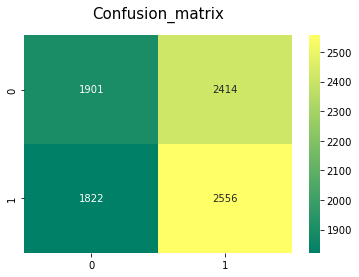

In [450]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_xgb=cross_val_score(modelXGB,x,y,cv=10,scoring='accuracy')
print('The cross validated score for XGB is:',round(result_xgb.mean()*100,2))
y_predXGB = cross_val_predict(modelXGB, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predXGB),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [289]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=50, algorithm='brute', p=1)
modelKNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=50, p=1)

In [290]:
y_predictKNN = modelKNN.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictKNN)
accuracy
#0.7377803335250144

0.7918343875790684

In [154]:
cmKNN = confusion_matrix(y_test, y_predictKNN)
cmKNN

array([[725, 140],
       [371, 503]], dtype=int64)

The cross validated score for KNN is: 59.15


Text(0.5, 1.05, 'Confusion_matrix')

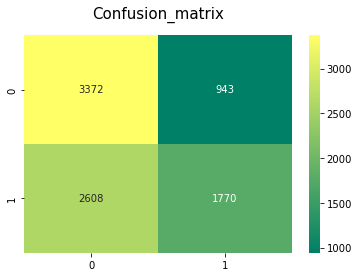

In [477]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(modelKNN,x,y,cv=10,scoring='accuracy')
print('The cross validated score for KNN is:',round(result_knn.mean()*100,2))
y_predKNN = cross_val_predict(modelKNN, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predKNN),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)